# AMS 527 Homework 1 
**submitted by Jiaxi Zhao on 15th Feb, 2021**

In [2]:
import numpy as np
import sympy as sp
from sympy import *
from matplotlib import pyplot as plt 
%matplotlib inline

## Numerical differentiation
In this numerical experiment, we use the finite difference method to approximate the derivative of a function. We mainly consider two types of difference, namely, 
\begin{equation}
    \begin{aligned}
        &\frac{f(x + h) - f(x)}{h},    \\
        &\frac{f(x + h) - f(x - h)}{2h}.
    \end{aligned}
\end{equation}
Namely, the above formula represent two types of scheme, forward-difference and central difference. Moreover, we will test these algorithms within two precisions, i.e. double- and single-precision to illustrate the trade-off between truncate and round-off error.

### Forward difference + Double-precision floating point

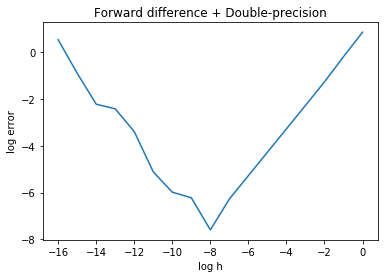

In [3]:
x = 1.
h = np.logspace(0, -16, 17, dtype = np.double)
df = np.zeros(17, dtype = np.double)
for i in range(17):
    df[i] = (np.tan(x + h[i]) - np.tan(x)) / h[i]
error = np.abs(df - np.tan(x) ** 2 - 1)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(np.log10(h), np.log10(error))
ax.set_xlabel('log h')
ax.set_ylabel('log error')
ax.set_title('Forward difference + Double-precision',fontsize=12)
plt.show()

\begin{remark}
    From the above figure, we conclude that the approximation error of the finite difference first decreases then increases as $h$ decreases. The initial error is dominated by finite difference approximation while the final error is dominated by round-off error. The minimum value for the magnitude of error is around 1e-8, which is attained at around $h = $ 1e-8, which is close to the ``rule of thumb'' $\sqrt{\epsilon_{\text{mach}}}$, where the machine precision of the double-precision floating point is given by $\epsilon_{\text{mach}} = 2^{-52} \approx 10^{-16}$. An heuristic illustration of this phenomenon is that the total error is a sum of the error of forward difference which is proportional to $h$ and a round-off error which is proportional to $\frac{\epsilon_{\text{mach}}}{h}$, then minimize this sum provides us with the optimal choice of $h$, i.e.
    \begin{equation}
        \arg \min_h \left\{ h + \frac{\epsilon_{\text{mach}}}{h} \right\} = \sqrt{\epsilon_{\text{mach}}}.
    \end{equation}
\end{remark}

### Forward difference + Single-precision floating point

[-3.7424474  4.0735197  3.4798265  3.4309623  3.426075   3.4332275
  3.2186508  3.5762787  0.         0.         0.         0.
  0.         0.         0.         0.         0.       ]


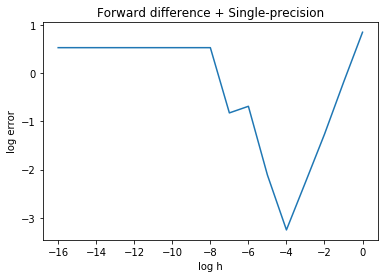

In [4]:
x = np.array(1, dtype = np.single)
h = np.logspace(0, -16, 17, dtype = np.single)
df = np.zeros(17, dtype = np.single)
for i in range(17):
    df[i] = (np.tan(x + h[i]) - np.tan(x)) / h[i]
print(df)
error = np.abs(df - np.tan(x) * np.tan(x) - 1)
np.set_printoptions(precision = 32)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(np.log10(h), np.log10(error))
ax.set_xlabel('log h')
ax.set_ylabel('log error')
ax.set_title('Forward difference + Single-precision',fontsize=12)
plt.show()

\begin{remark}
    From the above figure, we conclude that the approximation error of the finite difference first decreases then increases and finally remains invariant as $h$ decreases. The initial error is dominated by finite difference approximation while the final error is dominated by round-off error. At last stage, due to round-off error, the difference between $\tan(x + h), \tan(x)$ is round-off to $0$, leading to vanishing quotient. The minimum value for the magnitude of error is around 1e-3, which is attained at around $h = $ 1e-4, which is close to the ``rule of thumb'' $\sqrt{\epsilon_{\text{mach}}}$, where the machine precision of the single-precision floating point is given by $\epsilon_{\text{mach}} = 2^{-23} \approx 10^{-7}$.
\end{remark}

### Centered-difference + Double-precision floating point

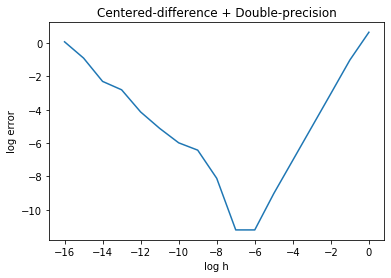

In [52]:
x = 1.
h = np.logspace(0, -16, 17, dtype = np.double)
df = np.zeros(17, dtype = np.double)
for i in range(17):
    df[i] = (np.tan(x + h[i]) - np.tan(x - h[i])) / h[i] / 2
error = np.abs(df - np.tan(x) ** 2 - 1)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(np.log10(h), np.log10(error))
ax.set_xlabel('log h')
ax.set_ylabel('log error')
ax.set_title('Centered-difference + Double-precision',fontsize=12)
plt.show()

\begin{remark}
    From the above figure, we conclude that the approximation error of the finite difference first decreases then increases as $h$ decreases. The initial error is dominated by finite difference approximation while the final error is dominated by round-off error. The minimum value for the magnitude of error is around 1e-11, which is attained at around $h = $ 1e-6, which is close to the $\sqrt[3]{\epsilon_{\text{mach}}}$, where the machine precision of the double-precision floating point is given by $\epsilon_{\text{mach}} = 2^{-52} \approx 10^{-16}$. An heuristic illustration of this phenomenon is that the total error is a sum of the error of forward difference which is proportional to $h^2$ and a round-off error which is proportional to $\frac{\epsilon_{\text{mach}}}{h}$, then minimize this sum provides us with the optimal choice of $h$, i.e.
    \begin{equation}
        \arg \min_h \left\{ h^2 + \frac{\epsilon_{\text{mach}}}{h} \right\} = \sqrt[3]{\epsilon_{\text{mach}}}.
    \end{equation}
\end{remark}

### Centered-difference + Single-precision floating point

[-1.0925199  3.5230076  3.4264624  3.4255383  3.426075   3.4332275
  3.33786    3.5762787  0.         0.         0.         0.
  0.         0.         0.         0.         0.       ]


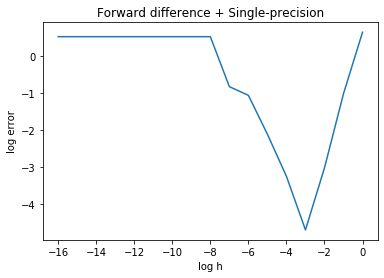

In [5]:
x = np.array(1, dtype = np.single)
h = np.logspace(0, -16, 17, dtype = np.single)
df = np.zeros(17, dtype = np.single)
for i in range(17):
    df[i] = (np.tan(x + h[i]) - np.tan(x - h[i])) / h[i] / 2
print(df)
error = np.abs(df - np.tan(x) * np.tan(x) - 1)
np.set_printoptions(precision = 32)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(np.log10(h), np.log10(error))
ax.set_xlabel('log h')
ax.set_ylabel('log error')
ax.set_title('Forward difference + Single-precision',fontsize=12)
plt.show()

\begin{remark}
    From the above figure, we conclude that the approximation error of the finite difference first decreases then increases and finally remains invariant as $h$ decreases. The initial error is dominated by finite difference approximation while the final error is dominated by round-off error. At last stage, due to round-off error, the difference between $\tan(x + h), \tan(x)$ is round-off to $0$, leading to vanishing quotient. The minimum value for the magnitude of error is around 1e-5, which is attained at around $h = $ 1e-3, which is close to the $\sqrt[3]{\epsilon_{\text{mach}}}$, where the machine precision of the single-precision floating point is given by $\epsilon_{\text{mach}} = 2^{-23} \approx 10^{-7}$.
\end{remark}

## Numerical precision in iteration
In this numerical experiment, we study the loss of precision during numerical operation. The example we will use to perform the calculation is given by 
\begin{equation}
    x_{k + 1} = 111 - \frac{1130 - \frac{3000}{x_{k - 1}}}{x_k}.
\end{equation}

### Iteration in single-precision

<class 'numpy.float32'>


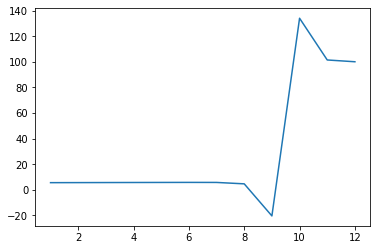

In [58]:
x = np.zeros(12, dtype = np.single)
x[0] = 11/2
x[1] = 61/11
for i in range(10):
    x[i + 2] = 111 - (1130 - 3000/x[i])/x[i + 1]
plt.plot(np.linspace(1, 12, 12), x)

### Iteration in double-precision

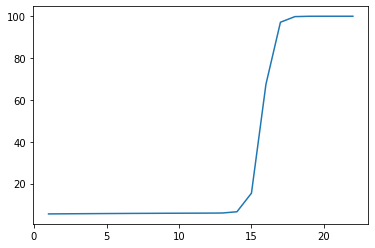

In [59]:
x = np.zeros(22)
x[0] = 11/2
x[1] = 61/11
for i in range(20):
    x[i + 2] = 111 - (1130 - 3000/x[i])/x[i + 1]
plt.plot(np.linspace(1, 22, 22), x)

### Theoretic explanation

Now, we provide a theoretic explanation of this loss of precision experiments. Viewing the calculation of $x_{k + 1}$ using $x_k, x_{k - 1}$ as a forward problem, we will first calculate the condition number of this forward problem, i.e.
\begin{equation}
    \begin{aligned}
        \frac{\frac{\Delta x_{k + 1}}{x_{k + 1}}}{\frac{\Delta x_{k}}{x_{k}}} &= \frac{\frac{1130 - \frac{3000}{x_{k - 1}}}{x_k}}{x_{k + 1}},    \\
        \frac{\frac{\Delta x_{k + 1}}{x_{k + 1}}}{\frac{\Delta x_{k}}{x_{k}}} &= \frac{-\frac{3000}{x_{k - 1}x_k}}{x_{k + 1}}.
    \end{aligned}
\end{equation}
Consequently, if we assume the sequence $\{ x_n \}$ remains in the interval $[5, 6]$, it is easy to estimate that the condition number of this forward problem is relatively large, i.e. $\frac{\frac{1130 - \frac{3000}{x_{k - 1}}}{x_k}}{x_{k + 1}}, \frac{-\frac{3000}{x_{k - 1}x_k}}{x_{k + 1}} \approx 15$. Consequently, each time we perform a forward calculation to obtain $x_k$ the relative error is magnified by a factor, which will be significantly large after 10 or 20 iteration. To illustrate this point, we also perform another iteration given by
\begin{equation}
    x_{k + 1} = 11 - \frac{50 - \frac{120}{x_{k - 1}}}{x_k}.
\end{equation}
In the experiment below, we find that this iteration is stable with exact precision.

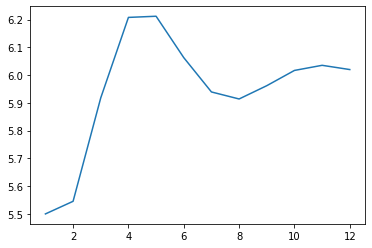

In [3]:
x = np.zeros(12, dtype = np.single)
x[0] = 11/2
x[1] = 61/11
for i in range(10):
    x[i + 2] = 11 - (50 - 120/x[i])/x[i + 1]
plt.plot(np.linspace(1, 12, 12), x)

## Solving quadratic equation
This are some boring code for HW. Do not look them. No nutrition.

### Naive implementation

In [71]:
a = 1e-155
b = -1e155
c = 1e155
def quadraticroot(a, b, c):
    x1 = (np.sqrt(b * b - 4 * a * c) - b) / 2 / a
    x2 = (- np.sqrt(b * b - 4 * a * c) - b) / 2 / a
    print(x1)
    print(x2)
quadraticroot(a, b, c)

inf
-inf


### Improved implementation

In [73]:
a = 1e-155
b = -1e155
c = 1e155
tol = 1e-5
tol1 = 1e-100
def quadraticroot_(a, b, c):
    # deg-2 or deg-1
    if np.abs(a) < tol1:
        print(-c/b)
        return
    
    # Rescaling
    minabc = np.min(np.abs([a, b, c]))
    a  = a/minabc
    b  = b/minabc
    c  = c/minabc
    
    if np.abs(a) < tol and np.abs(a * c) > tol:
        x1 = 2 * c / (np.sqrt(b * b - 4 * a * c) - b)
        x2 = 2 * c / (- np.sqrt(b * b - 4 * a * c) - b)
    else:
        x1 = (np.sqrt(b * b - 4 * a * c) - b) / 2 / a
        x2 = (- np.sqrt(b * b - 4 * a * c) - b) / 2 / a
    print(x1)
    print(x2)
quadraticroot_(a, b, c)

1.0
